# Import Dependencies

In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
import numpy as np
import pandas as pd
import xgboost as xgb
import math
import os
# os.environ["PATH"] = 'C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\Firstclose\\Lib\\site-packages\\graphviz' + os.pathsep +  os.environ['PATH']

# Creating Function for RMS

In [2]:
def rmse(y1, y2):
    ss = 0
    for x1, x2 in zip(y1, y2):
        x1 = float(x1)
        x2 = float(x2)
        ss += pow((x1 - x2), 2)
        
    m = ss / len(y1)
    return math.sqrt(m)

# Import data from data source

In [3]:
 
data_fitbit ="dailyActivity.csv"
data_sleeping = "sleepDay_merged.csv"

fitbit_analysis = pd.read_csv(data_fitbit)
sleep_data =pd.read_csv(data_sleeping)
#sleep_data.head()
# Combine the data into a single dataset
to_model_data = pd.merge(fitbit_analysis,sleep_data, on=["Id", 'ActivityDate'], how='outer')
to_model_data.head()


#to_model_data = fitbit_analysis.join(sleep_data, on=['Id', 'ActivityDate'])
#to_model_data = sleep_data.join( fitbit_analysis, on=['Id', 'ActivityDate'])

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTimeinBed,TotalMinutesAssleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,NaN,NaN,NaN,NaN,NaN
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,NaN,NaN,NaN,NaN,NaN
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,NaN,NaN,NaN,NaN,NaN
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,NaN,NaN,NaN,NaN,NaN
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,NaN,NaN,NaN,NaN,NaN


In [4]:
len(to_model_data)

1400

In [5]:
to_model_data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalTimeinBed', 'TotalMinutesAssleep', 'TotalSleepRecords',
       'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

In [6]:
to_model_data.to_csv('test.csv', index='false')

In [7]:
data = to_model_data.drop(columns = ['TotalDistance', 'TotalTimeinBed', 'TotalMinutesAssleep', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'])

In [8]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

# Defining input (features) and output (calories)

In [9]:
# X - features
# y - output - calories
X = data[['TotalSteps', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']]
y = data[['Calories']]

# Splitting into train and test sets

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# xgboost prep

In [11]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# model pret
param = {'n_estimators':10, 'max_depth':5, 'eta':0.1, 'objective':'reg:linear', 'nthread':4, 'eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]

# train model

In [12]:

num_round = 100
model = xgb.train(param, dtrain, num_round, evallist)
model.save_model('calorie_predictor.model')

[0]	eval-rmse:2094.36	train-rmse:2181.68
[1]	eval-rmse:1897.37	train-rmse:1977.39
[2]	eval-rmse:1722.03	train-rmse:1793.99
[3]	eval-rmse:1565.8	train-rmse:1629.62
[4]	eval-rmse:1423.42	train-rmse:1482.64
[5]	eval-rmse:1296.75	train-rmse:1351.13
[6]	eval-rmse:1182.99	train-rmse:1233.28
[7]	eval-rmse:1080.28	train-rmse:1128.58
[8]	eval-rmse:990.871	train-rmse:1035.02
[9]	eval-rmse:911.492	train-rmse:952.315
[10]	eval-rmse:840.588	train-rmse:878.594
[11]	eval-rmse:778.839	train-rmse:813.581
[12]	eval-rmse:724.535	train-rmse:756.27
[13]	eval-rmse:676.482	train-rmse:704.882
[14]	eval-rmse:636.287	train-rmse:658.089
[15]	eval-rmse:600.433	train-rmse:619.104
[16]	eval-rmse:570.337	train-rmse:584.004
[17]	eval-rmse:542.695	train-rmse:551.999
[18]	eval-rmse:520.443	train-rmse:524.344
[19]	eval-rmse:501.675	train-rmse:500.178
[20]	eval-rmse:485.714	train-rmse:479.987
[21]	eval-rmse:470.568	train-rmse:461.686
[22]	eval-rmse:458.27	train-rmse:446.555
[23]	eval-rmse:447.09	train-rmse:431.412
[24]	e

# test

In [13]:

y_train_pred = model.predict(dtrain)
y_test_pred = model.predict(dtest)

# Training RMSE

In [14]:

train_rmse = rmse(y_train.values, y_train_pred)
print('Training Root Mean Square Error (RMSE): {}'.format(train_rmse))

Training Root Mean Square Error (RMSE): 254.9184311609512


# Testing RMSE

In [15]:

test_rmse = rmse(y_test.values, y_test_pred)
print('Testing Root Mean Square Error (RMSE): {}'.format(test_rmse))

Testing Root Mean Square Error (RMSE): 375.99567548714697


# Training R2 score

In [16]:

train_r2 = r2_score(y_train, y_train_pred)
print('Training R2 score: {}'.format(train_r2))

Training R2 score: 0.8895153219587866


# Testing R2 Score

In [17]:
# R2
test_r2 = r2_score(y_test, y_test_pred)
print('Training R2 score: {}'.format(test_r2))

Training R2 score: 0.7106884015839826


# loading model

In [18]:

mod = xgb.Booster({'nthread':4})
mod.load_model('calorie_predictor.model')

# creating dummy input features for testing

# random features
num_instances = 1
num_features = np.shape(X_train)[1]
#dummy = np.random.rand(num_instances, num_features)

# user input features
dummy = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dummy = dummy[np.newaxis, :]


dum = xgb.DMatrix(dummy)
dum_predict = mod.predict(dum)
print('Predicted calories for dummy input data:')
print(dum_predict)


Predicted calories for dummy input data:
[2874.185]


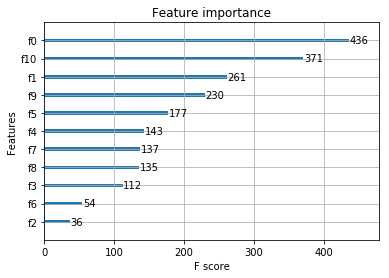

In [19]:
xgb.plot_importance(mod)

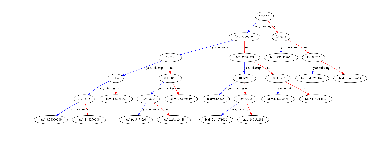

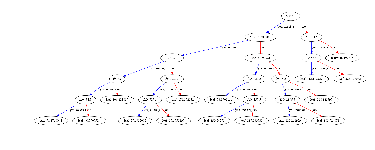

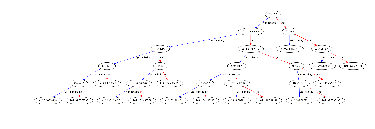

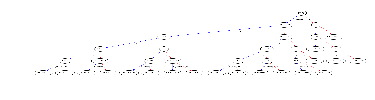

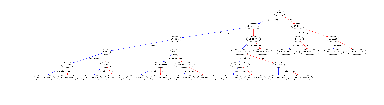

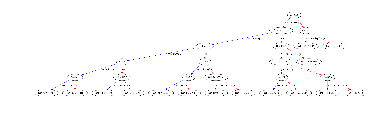

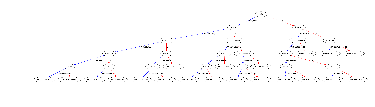

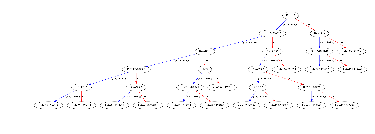

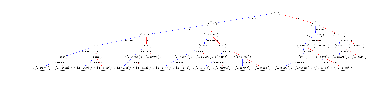

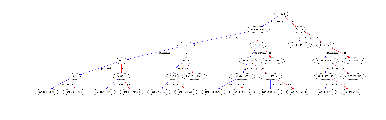

In [20]:
for ii in range(param['n_estimators']):
    ax = xgb.plot_tree(mod, num_trees=ii)
    plt.savefig('tree_{}.png'.format(ii))
    

In [25]:
os.environ['PATH']

'C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\Firstclose\\Lib\\site-packages\\graphviz;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose\\Library\\mingw-w64\\bin;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose\\Library\\usr\\bin;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose\\Library\\bin;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose\\Scripts;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\firstclose\\bin;C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\condabin;C:\\Users\\prasanna.jaiswal\\bin;C:\\Program Files\\Git\\mingw64\\bin;C:\\Program Files\\Git\\usr\\local\\bin;C:\\Program Files\\Git\\usr\\bin;C:\\Program Files\\Git\\usr\\bin;C:\\Program Files\\Git\\mingw64\\bin;C:\\Program Files\\G

In [31]:
!which dot.py

which: no dot.py in (/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/Firstclose/Lib/site-packages/graphviz:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose/Library/mingw-w64/bin:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose/Library/usr/bin:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose/Library/bin:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose/Scripts:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/envs/firstclose/bin:/c/Users/prasanna.jaiswal/AppData/Local/Continuum/anaconda3/condabin:/c/Users/prasanna.jaiswal/bin:/mingw64/bin:/usr/local/bin:/usr/bin:/usr/bin:/mingw64/bin:/usr/bin:/c/Users/prasanna.jaiswal/bin:/c/Program Files (x86)/Common Files/Oracle/Java/javapath:/c/Program Files (x86)/Intel/Intel(R) Management Engine Components/iCLS:/c/Program Files/Intel/Intel(R) 

In [28]:
os.chdir('C:\\Users\\prasanna.jaiswal\\AppData\\Local\\Continuum\\anaconda3\\envs\\Firstclose\\Lib\\site-packages\\graphviz')

In [32]:
os.listdir()

['backend.py',
 'dot.py',
 'files.py',
 'lang.py',
 'tools.py',
 '_compat.py',
 '__init__.py',
 '__pycache__']

In [21]:
!explorer .